# 다중분류 모델 개발 후 서비스 시 모델사용법

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
data = pd.read_csv('./data/wine_train.csv')
data.head()

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
1,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
2,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
3,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [5]:
data['와인_종류'].value_counts()

와인_종류
2    42
1    35
3    29
Name: count, dtype: int64

<Axes: >

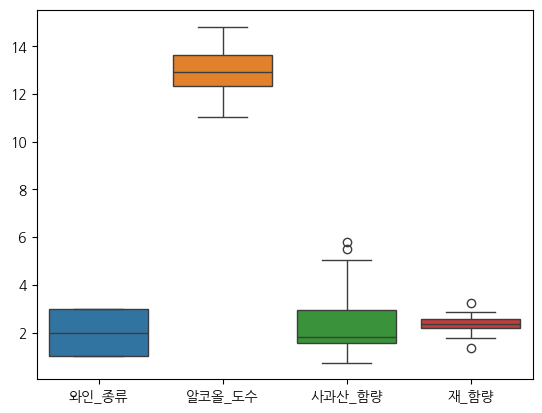

In [11]:
sns.boxplot(data.iloc[:,:4])

In [13]:
X = data.drop('와인_종류', axis=1)
y = data['와인_종류']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
mms = MinMaxScaler()
mms_X_train = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)

# joblib
* mms 변수에 있는 MinMaxScaler 가중치 저장
* 저장 : joblib.dump(경로, 파일명)
* 불러오기 : joblib.load(경로, 파일명)

In [37]:
import joblib

In [38]:
joblib.dump(mms, './model/MinMax_info.joblib')

['./model/MinMax_info.joblib']

In [29]:
y_train = pd.get_dummies(y_train)

In [23]:
y_test = pd.get_dummies(y_test)
y_test

,1,2,3
61,False,False,True
63,False,True,False
3,False,True,False
40,False,True,False
97,False,False,True
81,False,False,True
78,False,False,True
95,False,True,False
65,False,False,True
57,True,False,False


In [20]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,555 (13.89 KB)

 Trainable params: 3,555 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
import os

Epoch 1/1000


I0000 00:00:1747295406.858310   33530 service.cc:152] XLA service 0x7f7af401b4d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747295406.858341   33530 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-15 16:50:06.903707: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747295407.087859   33530 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3438 - loss: 1.0977

I0000 00:00:1747295408.578963   33530 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 708ms/step - accuracy: 0.3447 - loss: 1.0928 - val_accuracy: 0.3750 - val_loss: 1.0769
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4037 - loss: 1.0778 - val_accuracy: 0.4375 - val_loss: 1.0554
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5164 - loss: 1.0472 - val_accuracy: 0.5938 - val_loss: 1.0383
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6223 - loss: 1.0295 - val_accuracy: 0.6250 - val_loss: 1.0204
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6436 - loss: 1.0109 - val_accuracy: 0.6250 - val_loss: 0.9976
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6649 - loss: 0.9859 - val_accuracy: 0.6250 - val_loss: 0.9733
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6816 - loss: 0.9589 - val_accuracy: 0.7188 - val_loss: 0.9498
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7019 - loss: 0.9272 - val_accuracy: 0.7500 - val_loss: 0.9

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9709 - loss: 0.0725 - val_accuracy: 0.9688 - val_loss: 0.1201
Epoch 52/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9893 - loss: 0.0697 - val_accuracy: 0.9688 - val_loss: 0.1183
Epoch 53/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9893 - loss: 0.0568 - val_accuracy: 0.9688 - val_loss: 0.1189
Epoch 54/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9932 - loss: 0.0524 - val_accuracy: 0.9688 - val_loss: 0.1196
Epoch 55/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0559 - val_accuracy: 0.9688 - val_loss: 0.1116
Epoch 56/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0593 - val_accuracy: 0.9688 - val_loss: 0.1071
Epoch 57/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0568 - val_accuracy: 0.9688 - val_loss: 0.1071
Epoch 58/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0438 - val_accuracy: 0.9688 - val_los

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9688 - val_loss: 0.0929
Epoch 102/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9688 - val_loss: 0.0912
Epoch 103/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.9688 - val_loss: 0.0881
Epoch 104/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.9688 - val_loss: 0.0862
Epoch 105/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9688 - val_loss: 0.0847
Epoch 106/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.9688 - val_loss: 0.0839
Epoch 107/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.9688 - val_loss: 0.0821
Epoch 108/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.9688 - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9688 - val_loss: 0.0882
Epoch 152/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9688 - val_loss: 0.0859
Epoch 153/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9688 - val_loss: 0.0867
Epoch 154/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9688 - val_loss: 0.0891
Epoch 155/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9688 - val_loss: 0.0913
Epoch 156/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9688 - val_loss: 0.0953
Epoch 157/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9688 - val_loss: 0.0952
Epoch 158/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9688 - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9688 - val_loss: 0.1058
Epoch 202/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9688 - val_loss: 0.1088
Epoch 203/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9688 - val_loss: 0.1107
Epoch 204/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9688 - val_loss: 0.1119
Epoch 205/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9688 - val_loss: 0.1110
Epoch 206/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9688 - val_loss: 0.1098
Epoch 207/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9688 - val_loss: 0.1074
Epoch 208/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9688 - 

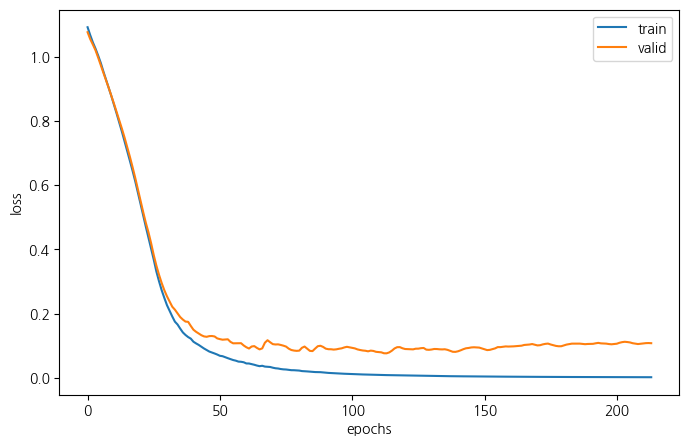

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=100)
os.makedirs('./model', exist_ok=True) # 디렉토리 자동 생성
filepath = './model/wine_best_model.keras'
model_save = ModelCheckpoint(filepath, save_best_only=True)
history = model.fit(mms_X_train, y_train, epochs=1000, 
                    batch_size=32, validation_data=(mms_X_test, y_test),
                    callbacks=[early_stop, model_save])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

# 머신러닝 모델과 스케일러  저장하기

In [39]:
data = pd.read_csv('./data/wine_train.csv')
data.head()

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
1,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
2,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
3,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [5]:
data['와인_종류'].value_counts()

와인_종류
2    42
1    35
3    29
Name: count, dtype: int64

<Axes: >

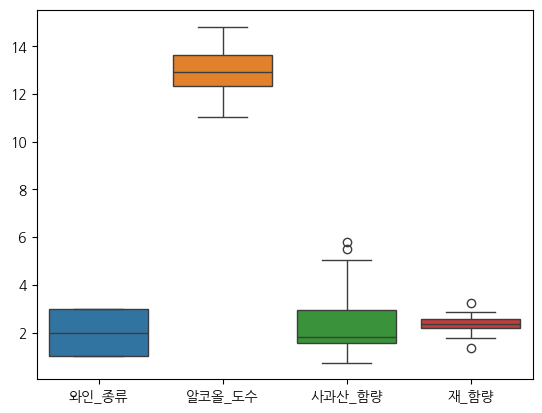

In [11]:
sns.boxplot(data.iloc[:,:4])

In [40]:
X = data.drop('와인_종류', axis=1)
y = data['와인_종류']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mms = MinMaxScaler()
mms_X_train = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)

# joblib
* mms 변수에 있는 MinMaxScaler 가중치 저장
* 저장 : joblib.dump(경로, 파일명)
* 불러오기 : joblib.load(경로, 파일명)

In [37]:
import joblib

In [43]:
joblib.dump(mms, './model/MinMax_info2.joblib')

['./model/MinMax_info2.joblib']

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [46]:
rfc = RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=42)
rfc.fit(mms_X_train, y_train)
pred = rfc.predict(mms_X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.92      1.00      0.96        12
           3       1.00      0.90      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



In [47]:
joblib.dump(rfc, './model/rfc_model.joblib')

['./model/rfc_model.joblib']